# Part II - Analysis of Ford GoBike System Data
## by Jonathan Akwasi Adusei

## Investigation Overview


> The investigation in this project focused on how trip duration varies depending on the day and time of trip, as well as customer type.
> ## Key insights
    > 1.	The higher ride frequencies in the morning (8th and 9th hrs) and evening (17th and 18th hrs) can be attributed to rush hours when people leave for work and return later in the evening.
    > 2.	Trips by customer user type last longer than trips by subscriber user type.
    > 3.	Weekend trips last longer than weekday trips.



## Dataset Overview

> The data comes from Ford GoBike, a bike-sharing service. It was founded in 2013 and is based in San Francisco, California. They now have around 3,000 bicycles and 270 stations in northern California. I examined data from the San Francisco Bay Area between February and March 2019 for this project. The data contained the following characteristics: member's birth and gender, User Type (Subscriber or Customer), Trip Duration (in seconds), Trip Start and End Dates, Start and End Station Names, and so on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# downloading the WeRateDogs Twitter archive data in a dataframe as 'archive'
bike = pd.read_csv('201902-fordgobike-tripdata_cleaned.csv')

In [3]:
bike.dropna(inplace=True)

bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

bike['bike_id'] =bike.bike_id.astype(str)


import datetime as dt
bike['start_day'] = bike['start_time'].dt.day_name()
bike['start_month'] = bike['start_time'].dt.month_name()
# bike['start_year'] = bike['start_time'].dt.year
bike['start_hr'] = bike['start_time'].dt.hour
bike['start_hr'] = bike.start_hr.astype(str)


bike['end_day'] = bike['end_time'].dt.day_name()
bike['end_month'] = bike['end_time'].dt.month_name()
bike['end_hr'] = bike['end_time'].dt.hour
bike['end_hr'] = bike.end_hr.astype(str)

In [4]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ride Distribution Over The  Days of The Week
The majority of rides were taken on Thursdays and Tuesdays. Weekends have the fewest trips.

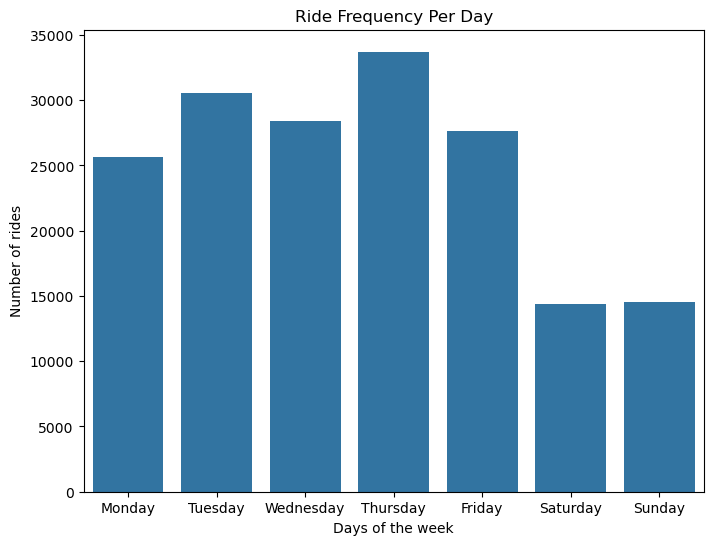

In [5]:
# ride frequency per days

plt.figure(figsize = (8,6))
sb.countplot(data = bike, x = 'start_day', color = sb.color_palette()[0])
plt.xlabel('Days of the week')
plt.ylabel('Number of rides')
plt.title('Ride Frequency Per Day');

## Bike Ride Distribution by Hours
High ride frequencies largely occur at peak hours when people are going to work in the morning (8:00 and 9:00 a.m.) and when they are leaving in the evening (17:00 and 18:00 p.m.).

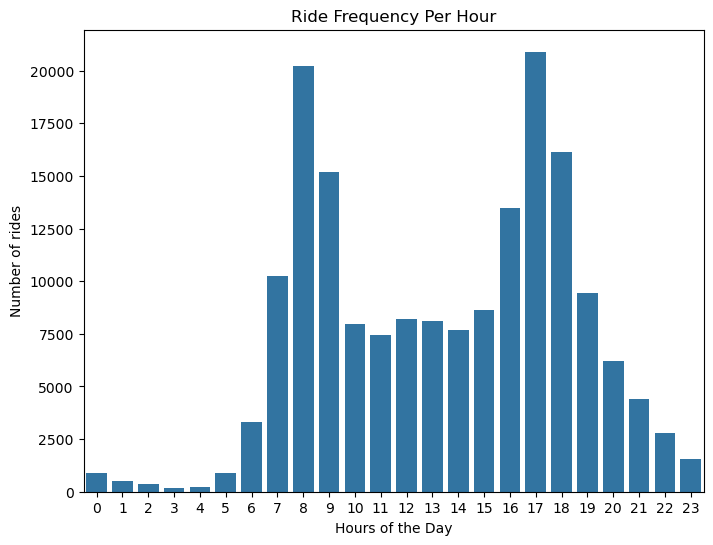

In [6]:
# ride frequency per days

plt.figure(figsize = (8,6))
sb.countplot(data = bike, x = 'start_hr', color = sb.color_palette()[0])
plt.xlabel('Hours of the Day')
plt.ylabel('Number of rides')
plt.title('Ride Frequency Per Hour');

## Distribution of Rides by User Type
Over 90% of all rides are taken by subscribers.

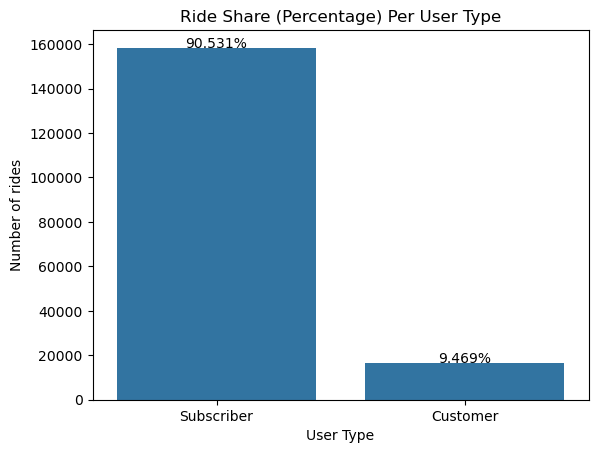

In [7]:
# plotting the frequency of ride by user type
ax = sb.countplot(data = bike, x = 'user_type',  color=sb.color_palette()[0], order=bike.user_type.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('User Type')
plt.ylabel('Number of rides')
plt.title('Ride Share (Percentage) Per User Type');

## Distribution of Trip Duration across Days and Customer Types
Trips taken by customers were longer irrespective of the day of the week, yet were longest on weekends. Subscribers on the other hand largely travel a short distance with a slight increase on weekends but not to the extent of customers.

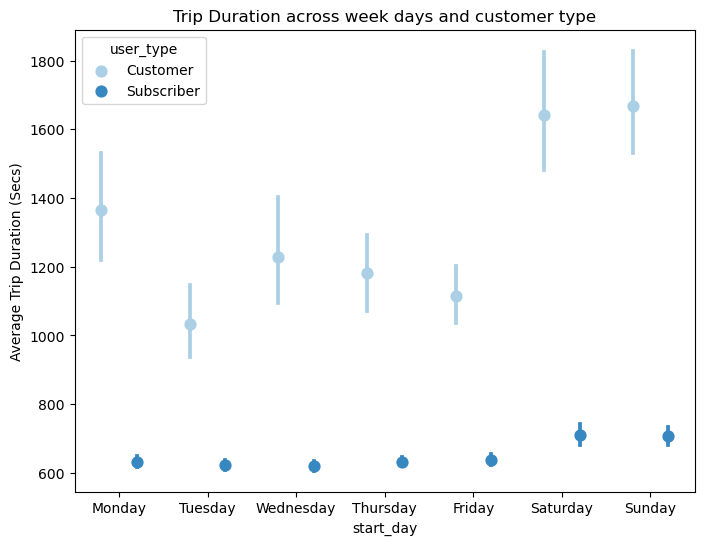

In [8]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x ='start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across week days and customer type')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [9]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 736970 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Jonathan\anaconda3\envs\py\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Jonathan\anaconda3\envs\py\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Jonathan\anaconda3\envs\py\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Jonathan\anaconda3\envs\py\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Jonathan\anaconda3\envs\py\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_sin

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 